### Data Preparation

In [1]:
import pandas as pd

In [2]:
df = pd.read_csv('../data/world_pop_wide.csv')

In [3]:
df.shape

(264, 61)

In [4]:
df.drop('Country Code', axis=1, inplace=True)

In [5]:
df.shape

(264, 60)

In [6]:
df.melt(id_vars='Country Name').rename(columns={'variable':'Year',
                                               'value':'Population'})

,Country Name,Year,Population
0,Aruba,1960,54211.0
1,Afghanistan,1960,8996973.0
2,Angola,1960,5454933.0
3,Albania,1960,1608800.0
4,Andorra,1960,13411.0
...,...,...,...
15571,Kosovo,2018,1845300.0
15572,"Yemen, Rep.",2018,28498687.0
15573,South Africa,2018,57779622.0
15574,Zambia,2018,17351822.0


In [7]:
melted = df.melt(id_vars='Country Name').rename(columns={'variable':'Year',
                                               'value':'Population'})

In [8]:
melted.shape

(15576, 3)

### Q1: Which countries have said the highest Percentage increase in Pop in 5 years?

In [9]:
year_condition = melted['Year'].str.contains('2013|2018')

In [10]:
def percentage_change(s):
    pdiff = s.iloc[1] - s.iloc[0]
    pchange = pdiff/s.iloc[0]
    return round(pchange *100, 2)

melted[year_condition].sort_values('Year').groupby('Country Name')['Population'].apply(
    percentage_change).sort_values(ascending=False).head(10)

Country Name
Oman                 28.28
Maldives             24.09
Equatorial Guinea    21.61
Niger                21.29
Uganda               19.69
Bahrain              19.35
Qatar                19.05
Angola               18.43
Congo, Dem. Rep.     17.81
Nauru                17.40
Name: Population, dtype: float64

### Q2: Countries wherein the Population has remained essentially unchanged for 30 years

In [11]:
year_condition = melted['Year'].astype(int) > 1988

In [12]:
melted[year_condition].groupby('Country Name')['Population'].std().sort_values().head(10)

Country Name
Dominica                           506.812895
Greenland                          518.119776
St. Vincent and the Grenadines     664.333583
Tuvalu                             806.531847
Faroe Islands                      845.241434
Nauru                             1008.657529
Palau                             1405.632774
Virgin Islands (U.S.)             1671.726208
Gibraltar                         2092.193987
Bermuda                           2442.434550
Name: Population, dtype: float64

In [13]:
hi_pop = melted['Population'] > 1e7

In [14]:
melted[year_condition & hi_pop].groupby('Country Name')['Population'].std().sort_values().head(10)

Country Name
Belarus                66969.688288
Sweden                 88725.637583
Czech Republic        130023.107931
Hungary               140186.009023
Portugal              179715.429186
Dominican Republic    216731.001899
Poland                232541.109992
Cuba                  241616.199674
Greece                277190.732204
South Sudan           314740.102384
Name: Population, dtype: float64

### Q3: Countries wherein the current population is not the max-ever Population 
This means that some earlier year had a higher population, so there has been a significant exodus

In [15]:
melted['Highest_pop'] = melted.groupby('Country Name')['Population'].transform(max)

In [16]:
df2018 = melted[melted['Year'] == '2018']

In [17]:
unequal_pop_rows = df2018['Population'] != df2018['Highest_pop']

In [18]:
df2018[unequal_pop_rows]['Country Name'].values

array(['Albania', 'Andorra', 'Armenia', 'American Samoa', 'Bulgaria',
       'Bosnia and Herzegovina', 'Belarus', 'Bermuda',
       'Central Europe and the Baltics', 'Cuba', 'Curacao', 'Dominica',
       'Eritrea', 'Spain', 'Estonia', 'Georgia', 'Gibraltar', 'Greece',
       'Greenland', 'Guyana', 'Croatia', 'Hungary', 'Isle of Man',
       'Not classified', 'Italy', 'Japan', 'Lithuania', 'Latvia',
       'St. Martin (French part)', 'Moldova', 'Montenegro',
       'Northern Mariana Islands', 'Nauru', 'Palau', 'Poland',
       'Puerto Rico', 'Portugal', 'Romania', 'Russian Federation',
       'Serbia', 'Syrian Arab Republic', 'Tonga', 'Ukraine',
       'Venezuela, RB', 'Virgin Islands (U.S.)', 'Kosovo'], dtype=object)

https://youtu.be/ygYJNXbgLGY


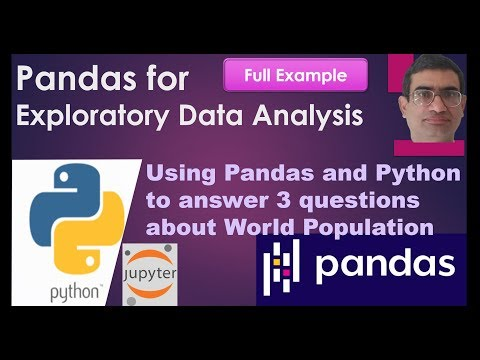

In [19]:
vstr = 'ygYJNXbgLGY'
from IPython.display import YouTubeVideo
YouTubeVideo(vstr)